In [58]:
from __future__ import absolute_import, division, print_function

from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import os

from tensorflow.keras import layers
from tensorflow.keras import optimizers 

import pandas as pd
import numpy as np

tf.VERSION

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_data = image_generator.flow_from_directory("flower_photos",target_size=(32,32))
validation_data = image_generator.flow_from_directory("flower_photos_test",target_size=(32,32))

for image_batch,label_batch in train_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    self.epoch_val_loss = []
    self.epoch_val_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
  def on_epoch_end(self, epoch, logs=None):
    self.epoch_val_loss.append(logs['val_loss'])
    self.epoch_val_acc.append(logs['val_acc'])

runs = [2, 3]
activation = [0, 0, 1, 1, 2, 2]
lossF = ['categorical_crossentropy', 'mean_squared_error', 'categorical_crossentropy', 'mean_squared_error', 'categorical_crossentropy', 'mean_squared_error']
saveName = ['Tanh', 'MSETanh', 'RELU', 'MSERELU', 'LeakyRELU', 'MSELeakyRELU']

Found 3303 images belonging to 5 classes.
Found 367 images belonging to 5 classes.
Image batch shape:  (32, 32, 32, 3)
Label batch shape:  (32, 5)


In [ ]:
for id in runs:
    model = None
    if (activation[id] == 0):
        # CNN 2
        model = tf.keras.Sequential([
          layers.Conv2D(32, [3, 3], (1, 1), 'valid', input_shape=(image_batch.shape[1], image_batch.shape[2], image_batch.shape[3])),
          layers.Activation('tanh'),
          # layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(64, [3, 3], (1, 1), 'valid'),
          layers.Activation('tanh'),
          # layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(128, [3, 3], (1, 1), 'valid'),
          layers.Activation('tanh'),
          # layers.LeakyReLU(alpha=0.3),
          layers.Flatten(),

          layers.Dense(train_data.num_classes, activation='softmax')
        ])
    if (activation[id] == 1):
        # CNN 2
        model = tf.keras.Sequential([
          layers.Conv2D(32, [3, 3], (1, 1), 'valid', input_shape=(image_batch.shape[1], image_batch.shape[2], image_batch.shape[3])),
          layers.Activation('relu'),
          # layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(64, [3, 3], (1, 1), 'valid'),
          layers.Activation('relu'),
          # layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(128, [3, 3], (1, 1), 'valid'),
          layers.Activation('relu'),
          # layers.LeakyReLU(alpha=0.3),
          layers.Flatten(),

          layers.Dense(train_data.num_classes, activation='softmax')
        ])
    if (activation[id] == 2):
        # CNN 2
        model = tf.keras.Sequential([
          layers.Conv2D(32, [3, 3], (1, 1), 'valid', input_shape=(image_batch.shape[1], image_batch.shape[2], image_batch.shape[3])),
          # layers.Activation('relu'),
          layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(64, [3, 3], (1, 1), 'valid'),
          # layers.Activation('relu'),
          layers.LeakyReLU(alpha=0.3),
          layers.MaxPooling2D(pool_size=(2 , 2)),

          layers.Conv2D(128, [3, 3], (1, 1), 'valid'),
          # layers.Activation('relu'),
          layers.LeakyReLU(alpha=0.3),
          layers.Flatten(),

          layers.Dense(train_data.num_classes, activation='softmax')
        ])
    model.compile(
        optimizer=tf.train.AdamOptimizer(), 
        loss=lossF[id],
        metrics=['accuracy'])
    
    batch_stats = CollectBatchStats()
    model.fit_generator(train_data, epochs=4, 
        callbacks = [batch_stats],
        validation_data = validation_data)
    
    results = pd.DataFrame({"losses":batch_stats.batch_losses, "accuracy":batch_stats.batch_acc})
    results.to_csv("saved_results/cnn"+saveName[id]+"Data.csv", ',')
    results = pd.DataFrame({"losses":batch_stats.epoch_val_loss, "accuracy":batch_stats.epoch_val_acc})
    results.to_csv("saved_results/cnn"+saveName[id]+"ValData.csv", ',')

NameError: name 'data' is not defined

In [143]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
actFunc = ['sigmoid','relu','leaky','tanh']
lossFunc = ['mean_squared_error','categorical_crossentropy']
imSizes = [16]

def getData(size):
    t_data = image_generator.flow_from_directory("flower_photos",color_mode="grayscale",target_size=(size,size))
    v_data = image_generator.flow_from_directory("flower_photos_test",color_mode="grayscale",target_size=(size,size))
    return t_data, v_data

def plainVanilla(images, labels, activ, los):
    #print (images.shape[1], images.shape[2], images.shape[3])
    if actFunc[k] == 'leaky':
        model = tf.keras.Sequential([
            layers.Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
            layers.Dense(1024),
            layers.LeakyReLU(alpha=0.3),
            layers.Dense(512),
            layers.LeakyReLU(alpha=0.3),
            layers.Dense(labels, activation='softmax')
        ])
    else:
        model = tf.keras.Sequential([
            layers.Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
            layers.Dense(1024, activation=activ),
            #layers.Dropout(0.2),
            layers.Dense(512, activation=activ),
            #layers.Dropout(0.2),
            layers.Dense(labels, activation='softmax')
        ])
    model.compile(
        optimizer=tf.train.AdamOptimizer(), 
        loss=los,
        metrics=['accuracy'])
    return model

def trainModel(model, tr_dat, val_dat):
    batch_stats = CollectBatchStats()
    model.fit_generator(tr_dat, epochs=epoch, 
        callbacks = [batch_stats],         
        validation_data = val_dat)
    return callbacks

    

#initialisation
epoch = 16

savedMods = []
runs = 1
for i in range((len(imSizes))):
    train_dat, validation_dat = getData(imSizes[i])
    
    for image_batch,label_batch in train_dat:
        print("Image batch shape: ", image_batch.shape)
        print("Label batch shape: ", label_batch.shape)
        break
    
    for j in range(len(lossFunc)):
        for k in range(len(actFunc)):
            print ('\n \n')
            print ('Run '+ str(runs) +' has commenced')
            print ('\n')
            print ('Image size: '+ str(imSizes[i]) + ' * ' + str(imSizes[i]))
            print ('Loss function: '+lossFunc[j])
            print ('Activation function: '+actFunc[k])
            print ( '\n')
            model = plainVanilla(image_batch, train_dat.num_classes, actFunc[k], lossFunc[j])
            batch_stats = CollectBatchStats()
            mod = model.fit(train_dat,
                            epochs=epoch, 
                            validation_data=validation_dat,
                            callbacks=[batch_stats]
                           )
            savedMods.append([imSizes[i], actFunc[k], lossFunc[j], mod])
            runs += 1
            



Found 3303 images belonging to 5 classes.
Found 367 images belonging to 5 classes.
Image batch shape:  (32, 16, 16, 1)
Label batch shape:  (32, 5)

 

Run 1 has commenced


Image size: 16 * 16
Loss function: mean_squared_error
Activation function: sigmoid


Epoch 1/16
104/104 [==============================] - 22s 210ms/step - loss: 0.1738 - acc: 0.2319 - val_loss: 0.1732 - val_acc: 0.2534
Epoch 2/16
104/104 [==============================] - 21s 198ms/step - loss: 0.1676 - acc: 0.2682 - val_loss: 0.1650 - val_acc: 0.2752
Epoch 3/16
104/104 [==============================] - 19s 180ms/step - loss: 0.1647 - acc: 0.2909 - val_loss: 0.1642 - val_acc: 0.2779
Epoch 4/16
104/104 [==============================] - 18s 178ms/step - loss: 0.1638 - acc: 0.2997 - val_loss: 0.1618 - val_acc: 0.3134
Epoch 5/16
104/104 [==============================] - 18s 170ms/step - loss: 0.1626 - acc: 0.3127 - val_loss: 0.1635 - val_acc: 0.3025
Epoch 6/16
104/104 [==============================] - 18s 170ms/ste

104/104 [==============================] - 18s 171ms/step - loss: 0.1497 - acc: 0.3500 - val_loss: 0.1634 - val_acc: 0.2698
Epoch 5/16
104/104 [==============================] - 17s 161ms/step - loss: 0.1478 - acc: 0.3718 - val_loss: 0.1640 - val_acc: 0.2670
Epoch 6/16
104/104 [==============================] - 16s 157ms/step - loss: 0.1470 - acc: 0.3790 - val_loss: 0.1639 - val_acc: 0.3270
Epoch 7/16
104/104 [==============================] - 17s 160ms/step - loss: 0.1454 - acc: 0.3893 - val_loss: 0.1601 - val_acc: 0.2779
Epoch 8/16
104/104 [==============================] - 19s 184ms/step - loss: 0.1435 - acc: 0.4033 - val_loss: 0.1593 - val_acc: 0.2561
Epoch 9/16
104/104 [==============================] - 19s 184ms/step - loss: 0.1410 - acc: 0.4105 - val_loss: 0.1570 - val_acc: 0.2888
Epoch 10/16
104/104 [==============================] - 18s 171ms/step - loss: 0.1395 - acc: 0.4342 - val_loss: 0.1568 - val_acc: 0.3215
Epoch 11/16
104/104 [==============================] - 19s 182ms/

104/104 [==============================] - 17s 165ms/step - loss: 1.4731 - acc: 0.3491 - val_loss: 1.5411 - val_acc: 0.3324
Epoch 9/16
104/104 [==============================] - 17s 162ms/step - loss: 1.4649 - acc: 0.3518 - val_loss: 1.5302 - val_acc: 0.3433
Epoch 10/16
104/104 [==============================] - 17s 167ms/step - loss: 1.4699 - acc: 0.3451 - val_loss: 1.4830 - val_acc: 0.3542
Epoch 11/16
104/104 [==============================] - 19s 179ms/step - loss: 1.4599 - acc: 0.3636 - val_loss: 1.5162 - val_acc: 0.3025
Epoch 12/16
104/104 [==============================] - 20s 190ms/step - loss: 1.4527 - acc: 0.3748 - val_loss: 1.5063 - val_acc: 0.3624
Epoch 13/16
104/104 [==============================] - 20s 196ms/step - loss: 1.4241 - acc: 0.3833 - val_loss: 1.5047 - val_acc: 0.3243
Epoch 14/16
104/104 [==============================] - 19s 184ms/step - loss: 1.4222 - acc: 0.3815 - val_loss: 1.5247 - val_acc: 0.3460
Epoch 15/16
104/104 [==============================] - 20s 19

104/104 [==============================] - 18s 170ms/step - loss: 1.2573 - acc: 0.4708 - val_loss: 1.6498 - val_acc: 0.3433
Epoch 13/16
104/104 [==============================] - 18s 169ms/step - loss: 1.2648 - acc: 0.4768 - val_loss: 1.6713 - val_acc: 0.2916
Epoch 14/16
104/104 [==============================] - 18s 168ms/step - loss: 1.2503 - acc: 0.4989 - val_loss: 1.7157 - val_acc: 0.2698
Epoch 15/16
104/104 [==============================] - 18s 173ms/step - loss: 1.2229 - acc: 0.4998 - val_loss: 1.6820 - val_acc: 0.3243
Epoch 16/16
104/104 [==============================] - 17s 165ms/step - loss: 1.1874 - acc: 0.5101 - val_loss: 1.6687 - val_acc: 0.3488

 

Run 8 has commenced


Image size: 16 * 16
Loss function: categorical_crossentropy
Activation function: tanh


Epoch 1/16
104/104 [==============================] - 18s 178ms/step - loss: 1.7593 - acc: 0.2731 - val_loss: 1.6055 - val_acc: 0.2752
Epoch 2/16
104/104 [==============================] - 19s 187ms/step - loss: 1.5877

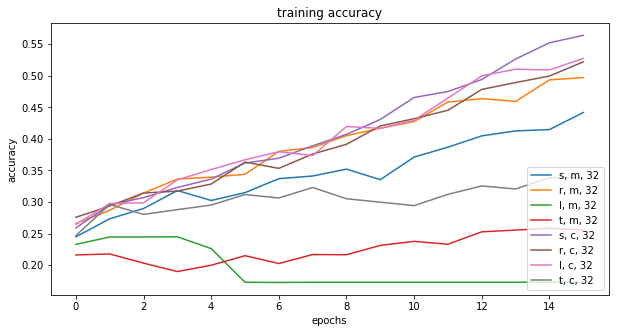

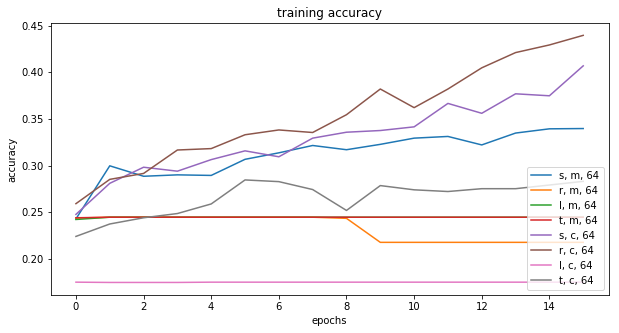

In [142]:
def plot_training(savedMods):
    ledge = []
    plt.figure(figsize=(10,5))
    for i in range(len(savedMods)):
        plt.plot(savedMods[i][3].history['validation_acc'])
        ledge.append(savedMods[i][1][0]+ ', ' + savedMods[i][2][0] + ', '+str(savedMods[i][0]))
    plt.title('validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(ledge, loc='lower right')
    plt.show()
mods32 = [savedMods[x] for x in range(len(savedMods)) if savedMods[x][0] == 32]
mods64 = [savedMods[x] for x in range(len(savedMods)) if savedMods[x][0] == 64]
plot_training(mods32)
plot_training(mods64)

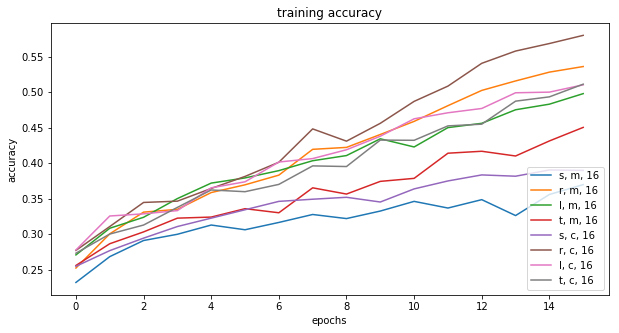

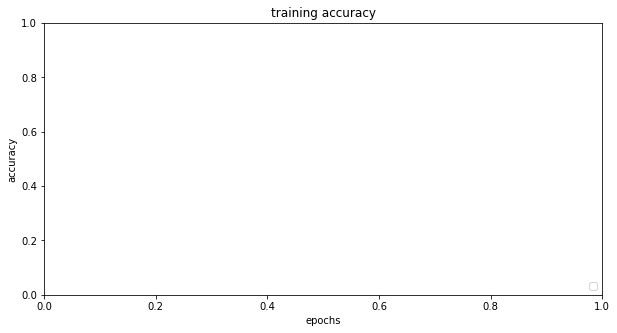

In [146]:
mods16 = [savedMods[x] for x in range(len(savedMods)) if savedMods[x][0] == 16]
plot_training(mods16)


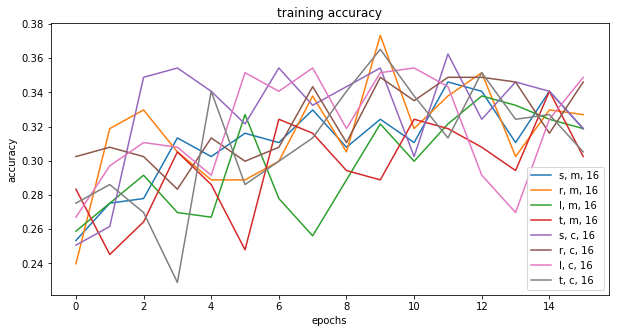

In [150]:
def plot_training(savedMods):
    ledge = []
    plt.figure(figsize=(10,5))
    for i in range(len(savedMods)):
        plt.plot(savedMods[i][3].history['val_acc'])
        ledge.append(savedMods[i][1][0]+ ', ' + savedMods[i][2][0] + ', '+str(savedMods[i][0]))
    plt.title('training accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(ledge, loc='lower right')
    plt.show()
plot_training(mods16)

In [51]:
# pak van elke soort een plaatje
soorten = os.listdir('flower_photos')[0:5]
simg = []
for n in range(5):
    simg.append(Image('flower_photos/'+soorten[n]+'/'+os.listdir('flower_photos/'+soorten[n])[5]))
print(soorten)

['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']
